In [1]:
import pandas as pd

In [2]:
abc = pd.read_csv('insurance_pred.csv')

In [3]:
abc

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
abc.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
abc.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
abc.shape

(1338, 7)

In [7]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
abc.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
print("number of rows",abc.shape[0])
print("number of columns",abc.shape[1])

number of rows 1338
number of columns 7


In [10]:
abc.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
abc.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
cat_cols = abc.select_dtypes(include=['object']).columns

In [13]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder 

In [15]:
en = LabelEncoder()
for i in cat_cols:
    abc[i]=en.fit_transform(abc[i])

In [16]:
abc.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
abc.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


In [18]:
abc.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
x = abc.drop(['charges'], axis=1)

In [20]:
y = abc['charges']

In [21]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [22]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [25]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)

svm = SVR()
svm.fit(x_train, y_train)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(x_train, y_train)

GradientBoostingRegressor()

In [28]:
y_pred1 = lr.predict(x_test)
y_pred2 = svm.predict(x_test)
y_pred3 = rf.predict(x_test)
y_pred4 = gr.predict(x_test)

df1 = pd.DataFrame({
    'Actual':y_test,
    'Lr':y_pred1,
    'svm':y_pred2,
    'rf':y_pred3,
    'gr':y_pred4})

In [29]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.497618,10719.754102,11001.128629
887,5272.17580,7116.295018,9493.240235,5502.735179,5840.174656
890,29330.98315,36909.013521,9648.305149,28320.883403,28001.980112
1293,9301.89355,9507.874691,9555.219911,10068.977230,9745.291602
259,33750.29180,27013.350008,9421.456253,34504.168583,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.427941,46703.194250,45431.423211
575,12222.89830,11814.555568,9625.054566,12689.290885,12465.025294
535,6067.12675,7638.107736,9504.794628,6376.066266,6974.336525
543,63770.42801,40959.081722,9604.857687,46645.016402,47862.047791


In [30]:
import matplotlib.pyplot as plt

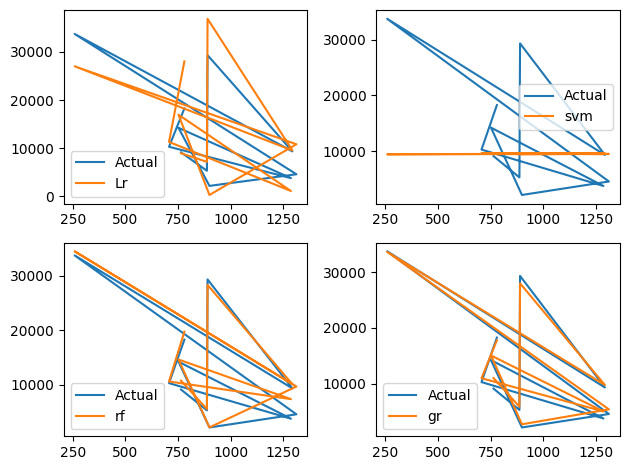

In [31]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svm")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")
plt.legend()

plt.tight_layout()

plt.legend()

In [32]:
from sklearn import metrics 

In [33]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [34]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07230823043884493 0.8624869092779618 0.8779726251291786


In [35]:
s1 =  metrics.mean_absolute_error(y_test, y_pred1)
s2 =  metrics.mean_absolute_error(y_test, y_pred2)
s3 =  metrics.mean_absolute_error(y_test, y_pred3)
s4 =  metrics.mean_absolute_error(y_test, y_pred4)

In [36]:
print(s1,s2,s3,s4)

4186.508898366432 8592.792242831822 2520.832852046766 2447.9515580545844


In [37]:
final_data = pd.DataFrame({
    'Models':['LR','SVR','RF','GB'],
    'R2_score':[score1,score2,score3,score4]})

In [38]:
final_data 

,Models,R2_score
0,LR,0.783346
1,SVR,-0.072308
2,RF,0.862487
3,GB,0.877973


In [39]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='R2_score'>

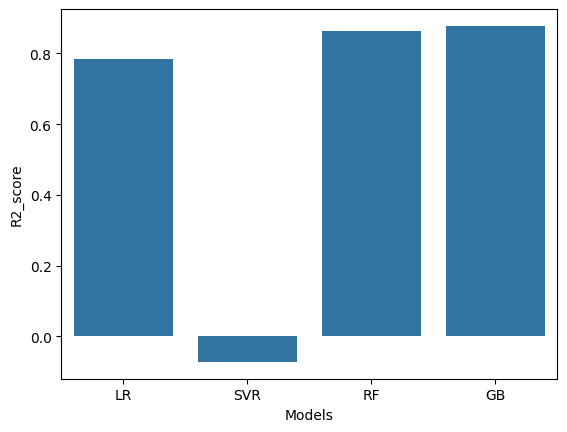

In [40]:
sns.barplot(x='Models', y='R2_score', data=final_data)

In [41]:
rf.feature_importances_

array([0.13623095, 0.00651582, 0.21230908, 0.02051627, 0.61017121,
       0.01425667])

In [42]:
fea = pd.Series(rf.feature_importances_,index=x_train.columns)

<Axes: >

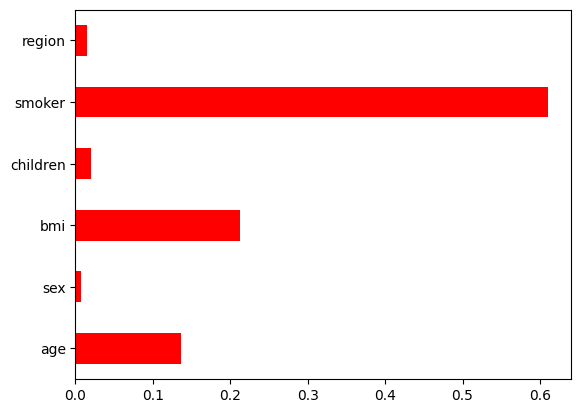

In [43]:
fea.plot(kind='barh',color='red')

In [44]:
gr.feature_importances_

array([1.17381070e-01, 5.46738411e-04, 1.90115205e-01, 1.06480612e-02,
       6.77885116e-01, 3.42380884e-03])

In [45]:
fea =  pd.Series(gr.feature_importances_,index=x_train.columns)

<Axes: >

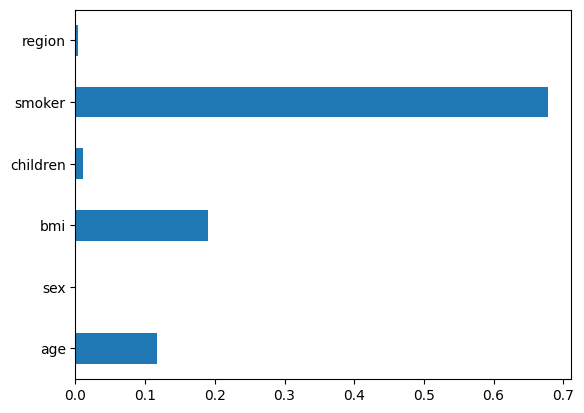

In [46]:
fea.plot(kind='barh')

In [47]:
x = abc.drop('charges', axis=1)
y = abc['charges']

In [48]:
gr = GradientBoostingRegressor()

In [49]:
gr.fit(x,y)

GradientBoostingRegressor()

In [50]:
import joblib

In [51]:
joblib.dump(gr,'insurance_cost_prediction')

['insurance_cost_prediction']

In [52]:
model = joblib.load('insurance_cost_prediction')

In [53]:
data = {'age':40,
        'sex':1,
        'bmi':40.30,
        'children':4,
        'smoker':1,
        'region':2}
df = pd.DataFrame(data,index=[0])

df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [54]:
model.predict(df)

array([42148.361888])

In [55]:
new_pred = gr.predict(df)
print(new_pred)

[42148.361888]


In [56]:
from tkinter import *

In [57]:
import joblib

In [ ]:

def show_entry():

    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())


    model = joblib.load('insurance_cost_prediction')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])

    Label(master,text="insurance cost").grid(row=7)
    Label(master,text=result).grid(row=8)
      
       
 
master = Tk()
master.title("insurance cost prediction")

label = Label(master,text = "insurance_cost_prediction", bg = "black",
              fg = "white").grid(row=0,columnspan=2)
Label(master,text = "Enter your age").grid(row=1)
Label(master,text = "Male or Female [0/1]").grid(row=2)
Label(master,text = "Enter your BMI value").grid(row=3)
Label(master,text = "Enter Number of Childrens").grid(row=4)
Label(master,text = "Smoker Yes/No [0/1]").grid(row=5)
Label(master,text = "Region").grid(row=6)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)


Button(master,text="predict",command=show_entry).grid()
master.mainloop()